In [20]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [25]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [106]:
#accessing the file through my github account
url = "https://raw.githubusercontent.com/AndresLonghorn/Real-Estate-Investment-Trust/main/kc_house_data.csv"
df = pd.read_csv(url)

## Display the data types of each column using the attribute dtypes

In [107]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Drop the columns "id" and "Unnamed: 0" 

In [114]:
#taking out the first column from the dataframe
df = pd.read_csv(url, index_col=0)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [116]:
#ID is left in the dataframe, this code here takes it out. 
#Now both ID and the 1st column have been removed
df = df.drop('id', axis=1)
print(df.columns.tolist())

['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


## Use the method value_counts to count the number of houses with unique floor values, and use the method to_frame() to convert it to a data frame. 

In [119]:
floor_count = df['floors'].value_counts().to_frame(name='count')
print(floor_count)


        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


##  Use the function boxplot in the seaborn library to produce a plot that can help determine whether houses with a waterfront view or without a waterfront view have more price outliers.

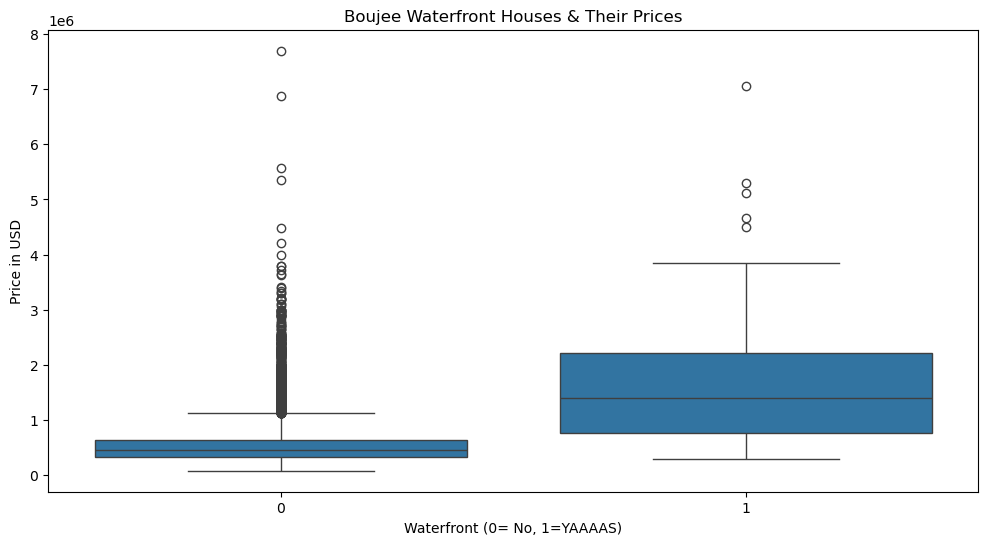

In [133]:
plt.figure(figsize=(12,6))
sns.boxplot(x='waterfront',y='price',data=df)
plt.title('Boujee Waterfront Houses & Their Prices')
plt.xlabel('Waterfront (0= No, 1=YAAAAS)')
plt.ylabel('Price in USD')
plt.show()

## Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price

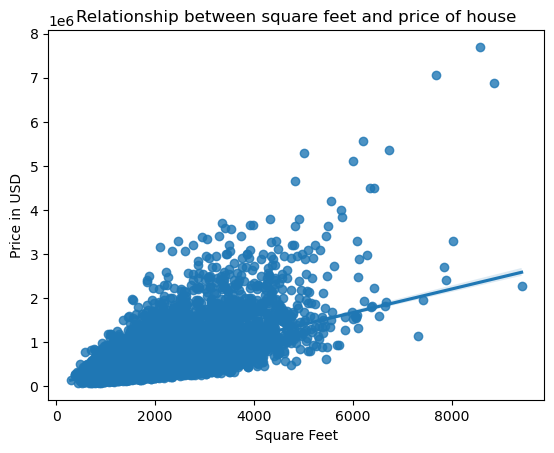

In [136]:
sns.regplot(x='sqft_above',y='price',data=df)
plt.title('Relationship between square feet and price of house')
plt.xlabel('Square Feet')
plt.ylabel('Price in USD')
plt.show()

## Fit a linear regression model to predict the price using the feature 'sqft_living', then calculate the R^2. Take a screenshot of your code and the value of the R^2. 

In [142]:
X= df['sqft_living'].values.reshape(-1,1)
y = df['price']
linear_regression_model = LinearRegression()
linear_regression_model.fit(X,y)

LinearRegression()

In [150]:
from sklearn.metrics import r2_score
y_predict = linear_regression_model.predict(X)
r2 = r2_score(y,y_predict)
print(f'R Square Score: {r2:.4f}')

R Square Score: 0.4929


## Fit a linear regression model to predict the 'price' using the list of features:
"floors" ,"waterfront" ,"lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"

In [170]:
#defining all the things(features) that we are asked to define
features= ["floors",
"waterfront",
"lat",
"bedrooms",
"sqft_basement",
"view",
"bathrooms",
"sqft_living15",
"sqft_above",
"grade",
"sqft_living"]

features_X = df[features]
features_y = df['price']

# Create and fit the model
features_model = LinearRegression()
features_model.fit(features_X, features_y)

# Predicting and evaluating
y_pred = features_model.predict(features_X)
features_r2 = r2_score(features_y, y_pred)

print(f"R^2 score: {features_r2:.4f}")




R^2 score: 0.6577


## Create a pipeline object that scales the data, performs a polynomial transform, and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R^2. 

In [177]:

pipe_X = df[features]
pipe_y = df['price']


#creating said pipeline model
pipeline_model = Pipeline([
    ('scaler', StandardScaler()), 
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
    ])

#fitting the pipeline
pipeline_model.fit(pipe_X,pipe_y)

#predicting and evaluating the pipeline model
y_pred = pipeline_model.predict(pipe_X)
pipeline_r2 = r2_score(pipe_y,y_pred)


print(f"R square score with polynomial features: {r2:.4f}")



R square score with polynomial features: 0.4929



## Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1, and calculate the R^2 using the test data. 

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

#defing the target and the predictors
ridge_regression_X = df[features]
ridge_regression_y = df['price']

#spliting the data 
X_train, X_test, y_train, y_test = train_test_split(ridge_regression_X,ridge_regression_y,test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)

# Predict and evaluate
ridge_regression_y_pred = ridge_model.predict(X_test_scaled)
r2 = r2_score(y_test, ridge_regression_y_pred)

print(f"R square score on test data using Ridge regression (alpha=0.1): {r2:.4f}")




R square score on test data using Ridge regression (alpha=0.1): 0.6615


## Perform a second-order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the R^2 utilizing the test data provided. 

In [187]:
polynomial_X = df[features]
polynomial_y = df["price"]

# Split the data, using a higher test data set from 20% to 40%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply second-order polynomial transformation
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred = ridge_model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)

print(f"R² score on test data using Ridge regression with polynomial features: {r2:.4f}")



R² score on test data using Ridge regression with polynomial features: 0.5252
